<a href="https://colab.research.google.com/github/fnilvuwu/generating_anime_characters_with_dcgan/blob/main/generating_anime_characters_with_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p><center style="font-family:newtimeroman;font-size:180%;"> Generating Anime Faces with DCGAN: A Dataset of High-Quality Anime </center></p>
### Table of contents:

* [Introduction](#1)
* [Import Libraries](#2)
* [Import DataSet](#3)
* [Preprocessing](#4)
* [Create Generator](#5)
* [Create Discriminator](#6)
* [Create Deep Convolutional GAN](#7)
* [Train The Model](#8)
* [Evaluation Of Model Results](#9)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Introduction </p>

<html>
<body>
  <h1>Generating Anime Faces with DCGAN: A Dataset of High-Quality Anime Girls</h1>
  <p> In this project, we aim to generate high-quality anime faces using the Deep Convolutional Generative Adversarial Networks (DCGAN) algorithm. The dataset used for this project consists of 63,632 anime faces, carefully curated to ensure quality and appeal.
The motivation behind this project is to fulfill the simple dream of generating perfect waifus, cute female anime faces that capture the essence of the anime art style.
The DCGAN algorithm offers an attractive approach to generating realistic and visually appealing anime faces. By training the generator and discriminator networks in an adversarial learning process, we can learn a hierarchy of representations, starting from object parts and progressing to scenes. This allows us to create compelling and diverse anime face images.
To showcase the capabilities of the project, we provide examples of both real and generated anime face images. By comparing the "real vs. fake" images, viewers can appreciate the quality and realism achieved through the DCGAN algorithm.
By combining the power of DCGAN and a meticulously curated anime face dataset, we aim to contribute to the world of anime art and provide a valuable resource for researchers, artists, and fans alike. Join us on this exciting journey to generate captivating anime faces and bring your favorite characters to life!</p>
</body>
</html>

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>

In [ ]:
# Import required libraries and tools
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape,
    BatchNormalization, Dropout, Input, ReLU, LeakyReLU
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Correct import
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Import DataSet </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
# ✅ Step 1: Install Kaggle API & Upload kaggle.json
from google.colab import files
import os

# Upload kaggle.json (Download from https://www.kaggle.com/account)
files.upload()

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permission to avoid warnings

# ✅ Step 2: Download the Anime Face Dataset from Kaggle
!kaggle datasets download -d splcher/animefacedataset

# ✅ Step 3: Unzip the dataset
!unzip animefacedataset.zip -d animefacedataset



Streaming output truncated to the last 5000 lines.
  inflating: animefacedataset/images/62764_2019.jpg  
  inflating: animefacedataset/images/62765_2019.jpg  
  inflating: animefacedataset/images/62766_2019.jpg  
  inflating: animefacedataset/images/62767_2019.jpg  
  inflating: animefacedataset/images/62768_2019.jpg  
  inflating: animefacedataset/images/62769_2019.jpg  
  inflating: animefacedataset/images/6276_2003.jpg  
  inflating: animefacedataset/images/62770_2019.jpg  
  inflating: animefacedataset/images/62771_2019.jpg  
  inflating: animefacedataset/images/62772_2019.jpg  
  inflating: animefacedataset/images/62773_2019.jpg  
  inflating: animefacedataset/images/62774_2019.jpg  
  inflating: animefacedataset/images/62775_2019.jpg  
  inflating: animefacedataset/images/62776_2019.jpg  
  inflating: animefacedataset/images/62777_2019.jpg  
  inflating: animefacedataset/images/62778_2019.jpg  
  inflating: animefacedataset/images/62779_2019.jpg  
  inflating: animefacedataset/im

In [ ]:
# ✅ Step 4: Load and Preprocess Dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure correct dataset path
DIR = "animefacedataset"

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(64, 64),  # Ensure this matches your generator input
    batch_size=16,  # Reduce batch size
    class_mode=None
)



Found 63565 images belonging to 1 classes.


**<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Preprocessing </p>
<a class="btn" href="#home">Tabel of Contents</a>

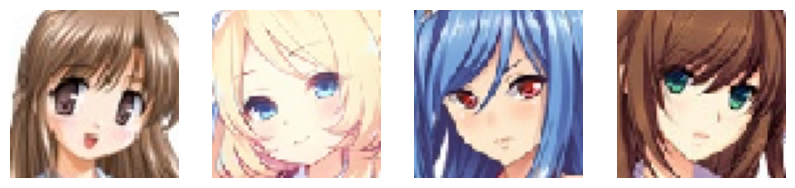

In [ ]:
# Visualizing a Batch of Anime Face Images
import matplotlib.pyplot as plt

# Get a batch of images from the generator
batch = next(train_generator)  # No labels, just images

# Plot the first 4 images
fig, ax = plt.subplots(ncols=4, figsize=(10, 10))
for idx, img in enumerate(batch[:4]):  # Directly access images
    ax[idx].imshow(img)  # No need for .astype(int), since images are normalized
    ax[idx].axis('off')  # Hide axes for better visualization

plt.show()


<html>
<head>
</head>
<body>
  <h1>Deep Convolutional Generative Adversarial Network</h1>
  <p>DCGAN (Deep Convolutional Generative Adversarial Network) is an advanced architecture and training methodology for generative adversarial networks (GANs) specifically designed for image synthesis tasks. It combines deep convolutional neural networks with the adversarial learning framework to generate high-quality and realistic images. </p>
</body>
</html>

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Create Generator </p>
<a class="btn" href="#home">Tabel of Contents</a>

<html>
<head>
</head>
<body>
  <h1> The Generator </h1>
  <p>In DCGAN, the generator and discriminator networks play crucial roles. The generator is responsible for generating synthetic images that resemble the target data distribution. It takes random noise as input and gradually transforms it into higher-dimensional outputs using convolutional layers, transposed convolutions, and activation functions like ReLU. Batch normalization is often used to stabilize the learning process. </p>
</body>
</html>

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32768)               │       4,227,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 16, 16, 256)         │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 32, 32, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 64, 64, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 3)           │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,983,107 (26.64 MB)

 Trainable params: 6,983,107 (26.64 MB)

 Non-trainable params: 0 (0.00 B)

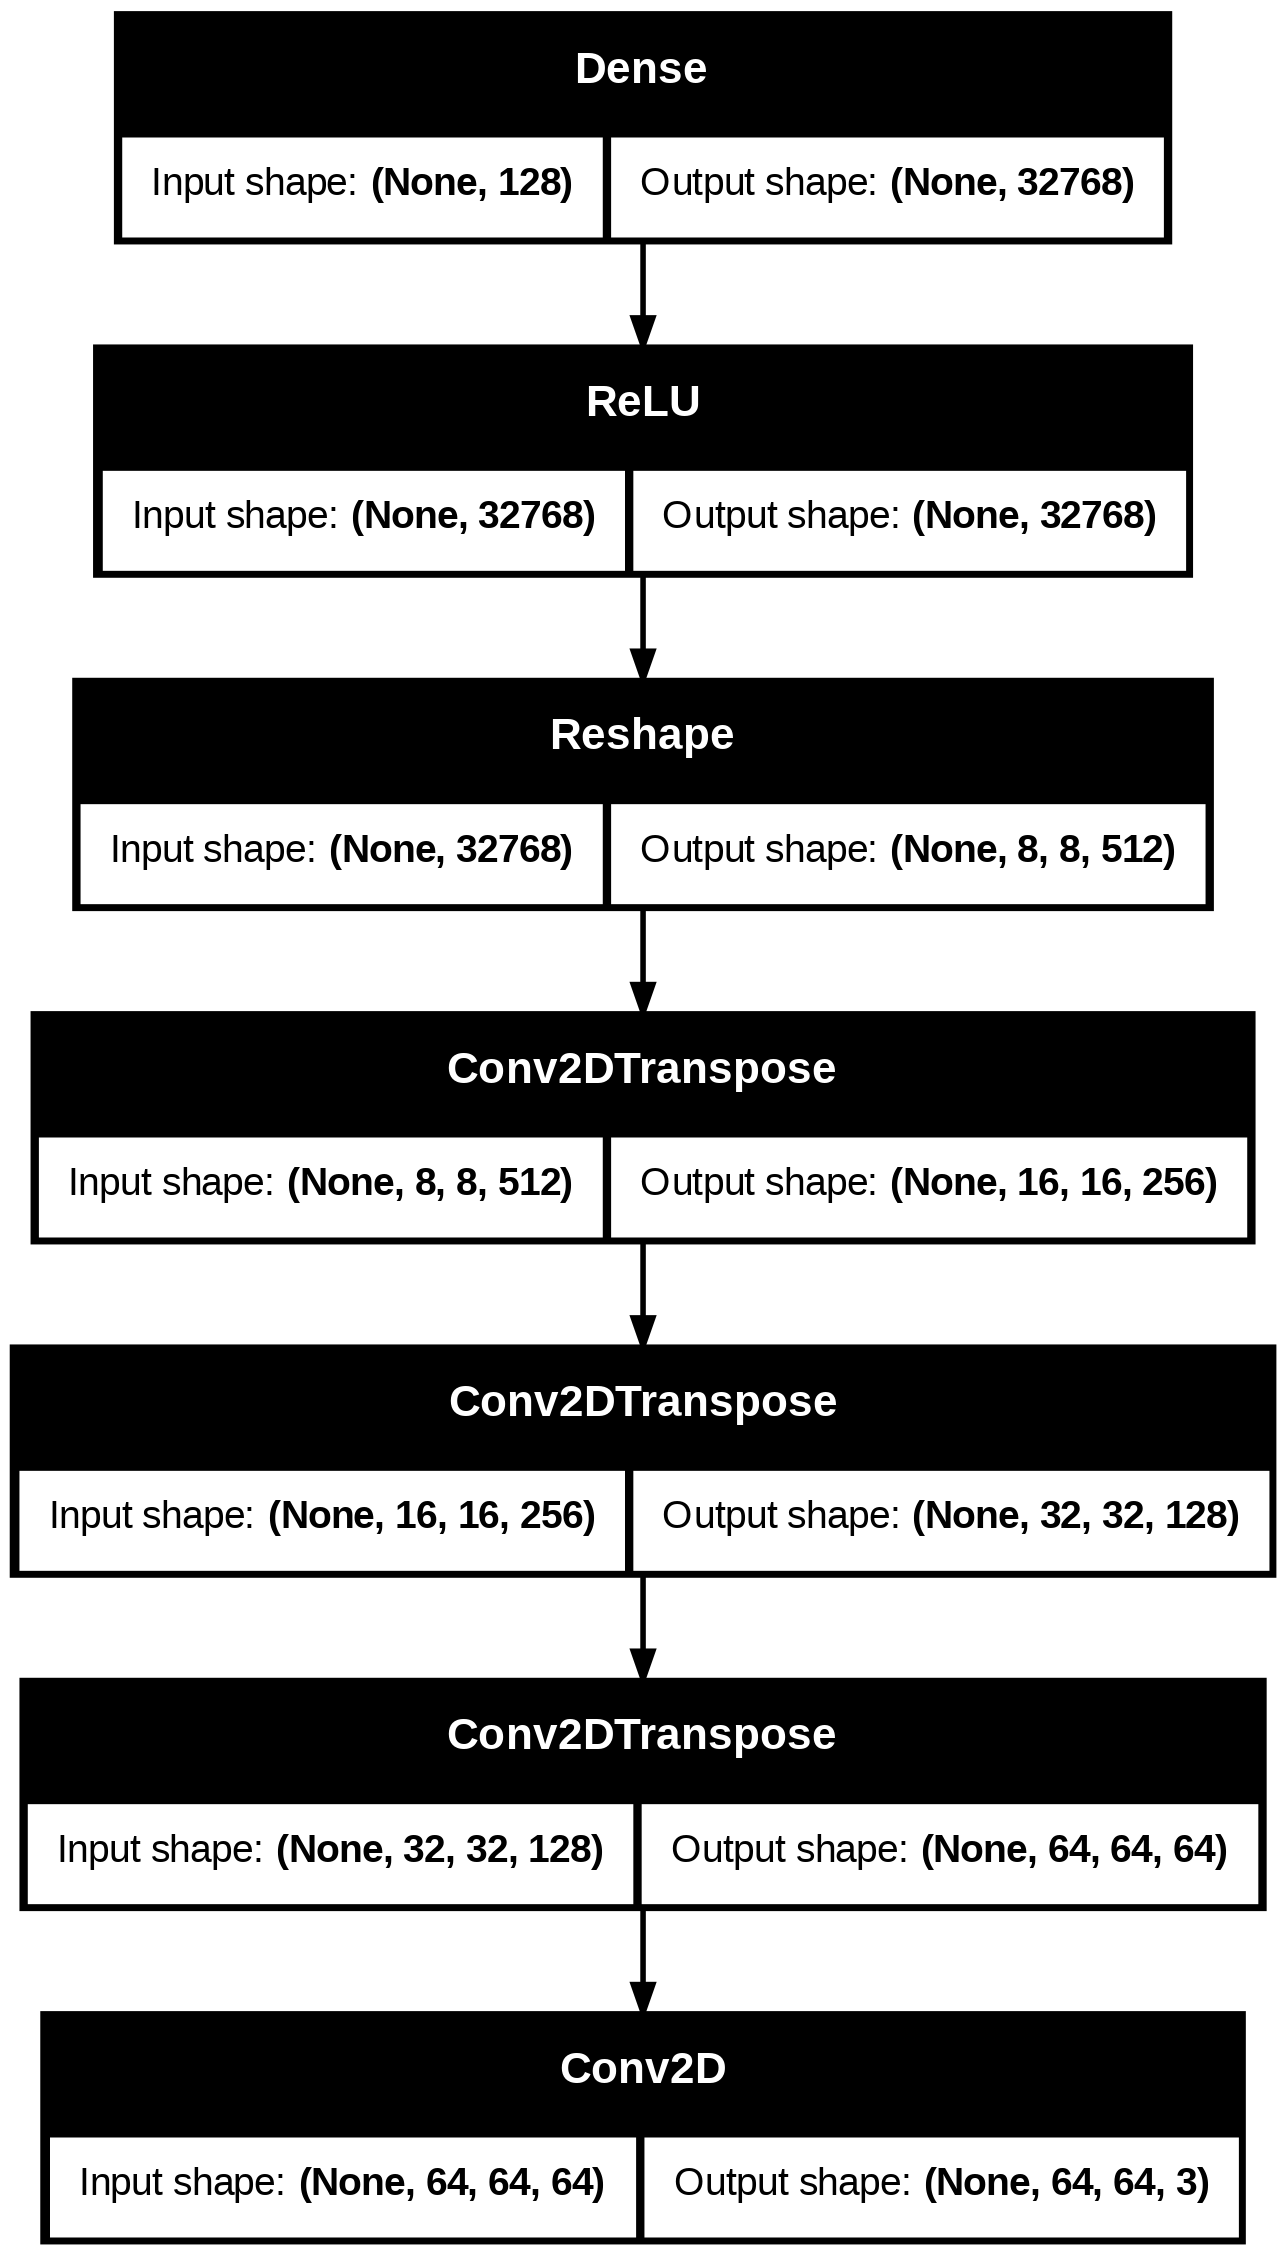

In [ ]:
# Creating the Generator Model

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 128

def Generator_Model():

    Generator = Sequential()

    # Random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())
    # Convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))
    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))


    return Generator

generator = Generator_Model()
generator.summary()
# Visualized Layers of generator
keras.utils.plot_model(generator, show_shapes=True)

<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Create Discriminator </p>
<a class="btn" href="#home">Tabel of Contents</a>

<html>
<head>
</head>
<body>
  <h1> The Discriminator </h1>
  <p> The discriminator, on the other hand, aims to distinguish between real and generated images. It utilizes convolutional layers, activation functions, and strided convolutions to downsample the spatial dimensions and capture image features. The discriminator is trained to maximize its ability to correctly classify images as real or fake. </p>
</body>
</html>

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,730,625 (10.42 MB)

 Trainable params: 2,730,625 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

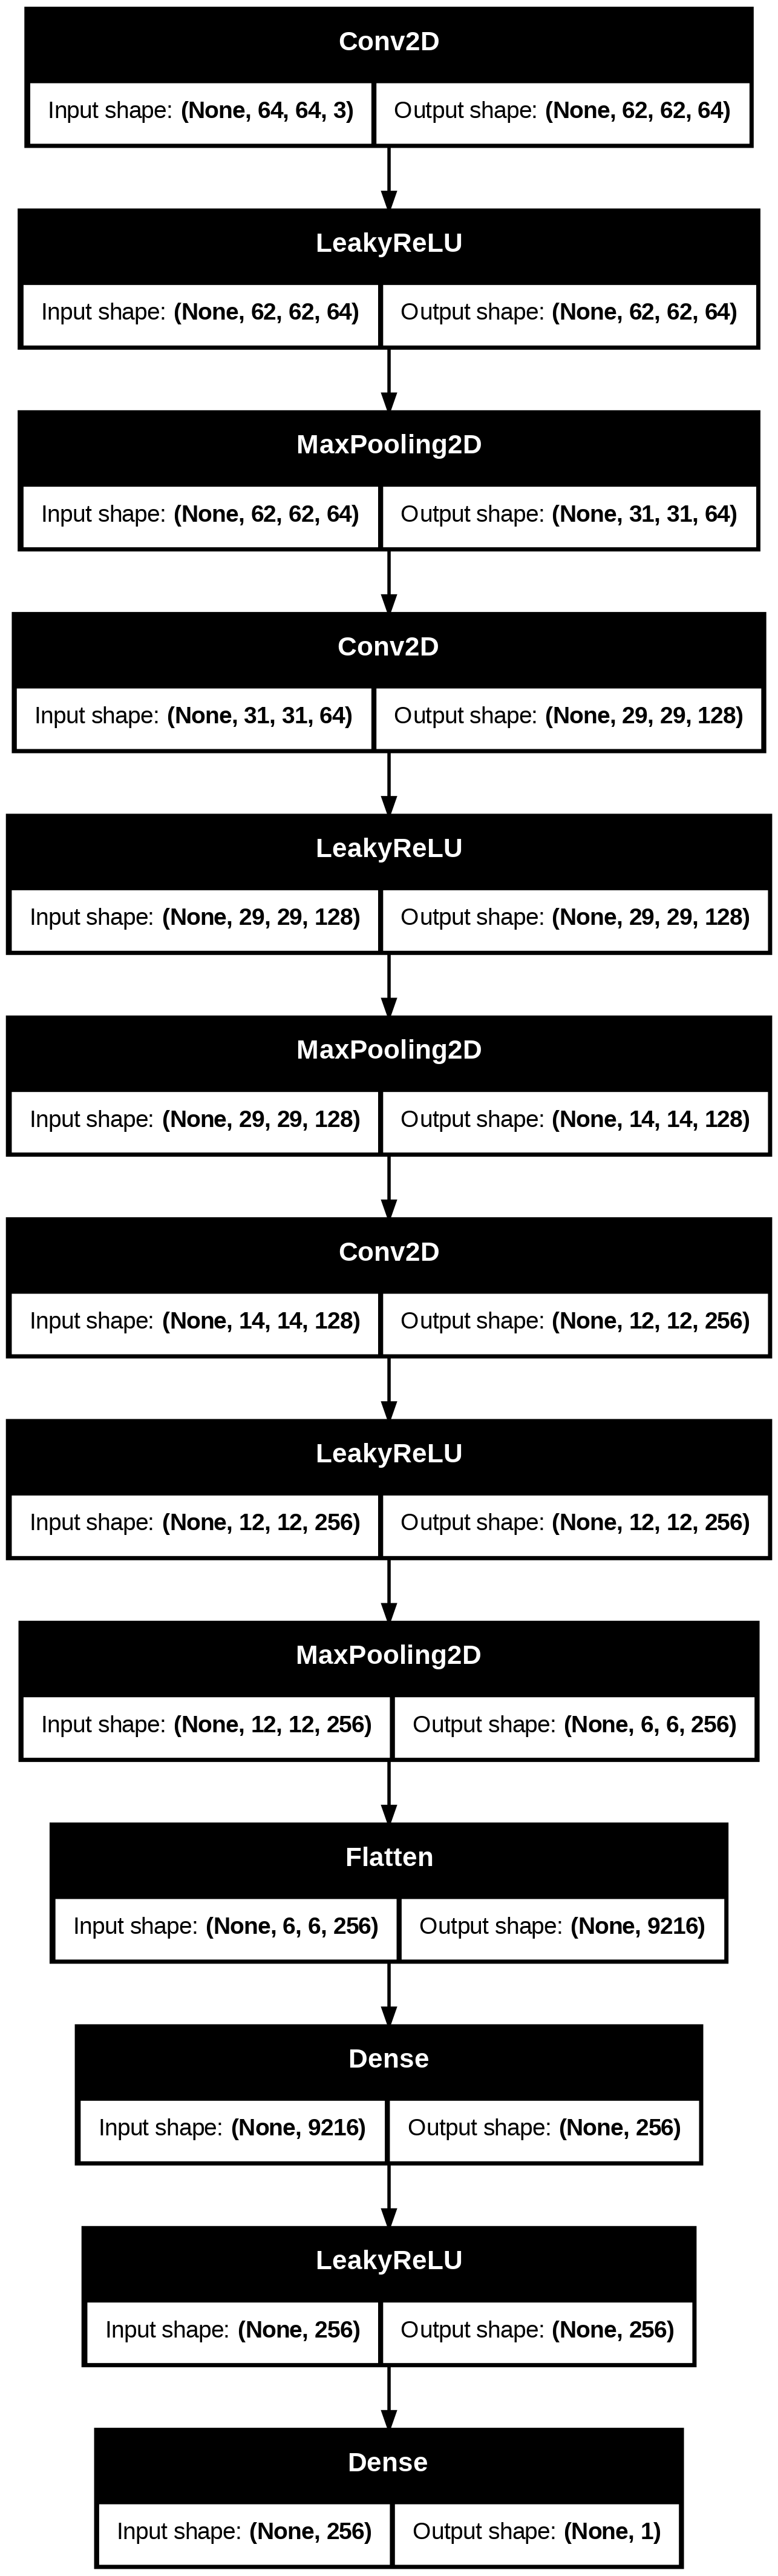

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU

# Creating the Discriminator Model
def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape))
    discriminator.add(LeakyReLU(alpha=0.2))  # ✅ Correct way to use LeakyReLU
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    discriminator.add(Conv2D(128, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU(alpha=0.2))  # ✅ Correct usage
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    discriminator.add(Conv2D(256, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU(alpha=0.2))  # ✅ Correct usage
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    discriminator.add(Flatten())
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(alpha=0.2))  # ✅ Correct usage

    discriminator.add(Dense(1, activation='sigmoid'))  # Output layer

    return discriminator

# Training The CNN
discriminator = Discriminator_Model()
discriminator.summary()

# Visualize Layers of discriminator
from tensorflow import keras
keras.utils.plot_model(discriminator, show_shapes=True)


<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Create Deep Convolutional GAN </p>
<a class="btn" href="#home">Tabel of Contents</a>

<html>
<head>
</head>
<body>
  <h1> The Training Process </h1>
  <p> The training process of DCGAN involves an adversarial interplay between the generator and discriminator. The generator aims to generate increasingly realistic images to deceive the discriminator, while the discriminator strives to improve its discrimination ability. This iterative process continues until the generator produces images that are visually convincing and indistinguishable from real images.
During training, the generator and discriminator networks are updated using techniques like stochastic gradient descent (SGD) or Adam optimization. The Binary Cross Entropy loss function is commonly used to compute the difference between predicted probabilities and target labels for both networks. </p>
</body>
</html>



In [ ]:
# DCGAN Model Training Step with Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')

    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)

            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)

            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2

        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))


        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)

        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))

        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

<html>
<head>
</head>
<body>
  <h1> The Monitoring process </h1>
  <p> To monitor the training progress, callbacks like the DCGANMonitor can be used. This callback generates images from random noise using the trained generator and visualizes them. Additionally, the generator can be saved at the end of training for future use. </p>
</body>
</html>



In [ ]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 255) + 255
        g_img.numpy()

    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')

<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Train The Model </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [ ]:
# Training DCGAN on Image Dataset for 40 Epochs

epochs = 30
beta = 0.5
latent_dim = 128  # Reduce from 300 to 128
lr_g = 0.0001  # Lower generator LR
lr_d = 0.00005  # Lower discriminator LR


dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# Fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor()])


Epoch 1/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 70s 15ms/step - d_loss: 0.2251 - g_loss: 2.6733
Epoch 2/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - d_loss: 0.1936 - g_loss: 3.4338
Epoch 3/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - d_loss: 0.1657 - g_loss: 3.8899
Epoch 4/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - d_loss: 0.1494 - g_loss: 4.2286
Epoch 5/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - d_loss: 0.1371 - g_loss: 4.3750
Epoch 6/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - d_loss: 0.1671 - g_loss: 4.3107
Epoch 7/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - d_loss: 0.1792 - g_loss: 4.1755
Epoch 8/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - d_loss: 0.1732 - g_loss: 3.9749
Epoch 9/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - d_loss: 0.1587 - g_loss: 4.0135
Epoch 10/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 53s 13ms/step - d_loss: 0.2036 - g_loss: 3.8292
Epoch 11/30
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 53s 13ms/step - d_loss: 0.1669 - g_loss: 3.8629
Epoch 12

<a id="9"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluation Of Model Results </p>
<a class="btn" href="#home">Tabel of Contents</a>

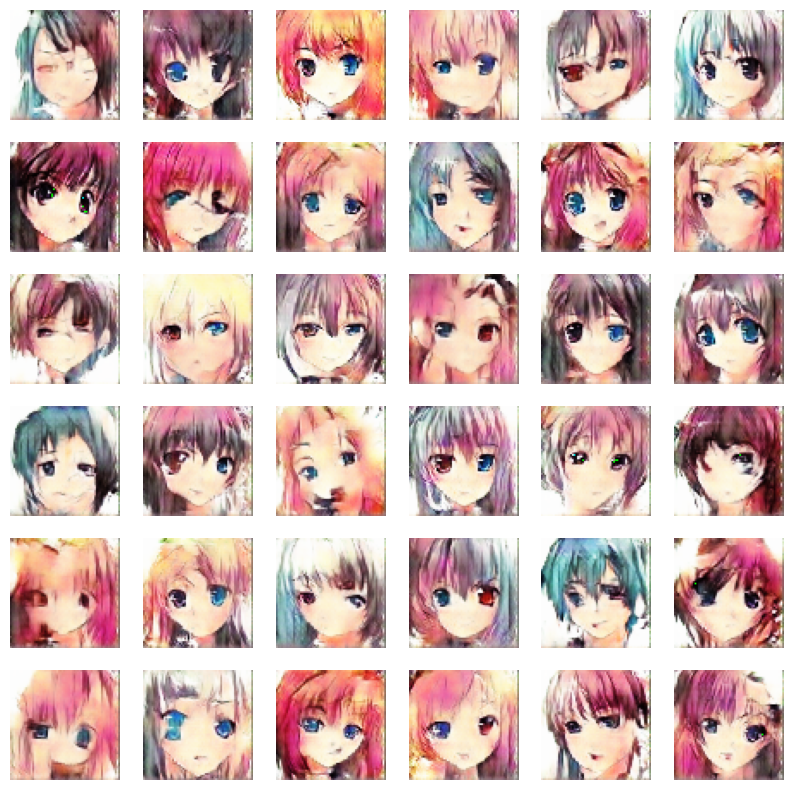

In [ ]:
# Generating 36 Random Images with DCGAN

plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 128])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

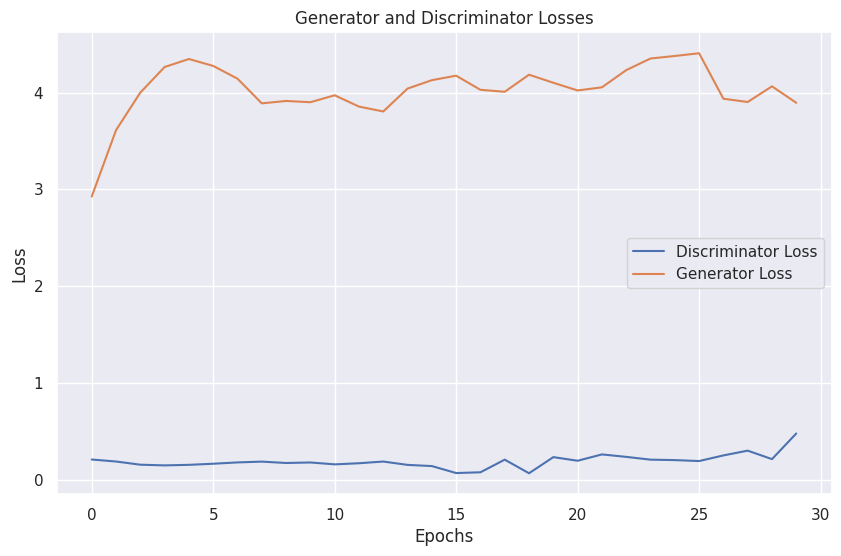

In [ ]:
import matplotlib.pyplot as plt

# Function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# Call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)

<a id="10"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </p>